# K-近邻算法（KNN）

K nearest neighbour

## 0、导引

### 如何进行电影分类
众所周知，电影可以按照题材分类，然而题材本身是如何定义的?由谁来判定某部电影属于哪
个题材?也就是说同一题材的电影具有哪些公共特征?这些都是在进行电影分类时必须要考虑的问
题。没有哪个电影人会说自己制作的电影和以前的某部电影类似，但我们确实知道每部电影在风格
上的确有可能会和同题材的电影相近。那么动作片具有哪些共有特征，使得动作片之间非常类似，
而与爱情片存在着明显的差别呢？动作片中也会存在接吻镜头，爱情片中也会存在打斗场景，我们
不能单纯依靠是否存在打斗或者亲吻来判断影片的类型。但是爱情片中的亲吻镜头更多，动作片中
的打斗场景也更频繁，基于此类场景在某部电影中出现的次数可以用来进行电影分类。

本章介绍第一个机器学习算法：K-近邻算法，它非常有效而且易于掌握。

## 1、k-近邻算法原理

简单地说，K-近邻算法采用测量不同特征值之间的距离方法进行分类。

- 优点：精度高、对异常值不敏感、无数据输入假定。
- 缺点：时间复杂度高、空间复杂度高。
- 适用数据范围：数值型和标称型。

### 工作原理

存在一个样本数据集合，也称作训练样本集，并且样本集中每个数据都存在标签，即我们知道样本集中每一数据
与所属分类的对应关系。输人没有标签的新数据后，将新数据的每个特征与样本集中数据对应的
特征进行比较，然后算法提取样本集中特征最相似数据（最近邻）的分类标签。一般来说，我们
只选择样本数据集中前K个最相似的数据，这就是K-近邻算法中K的出处,通常*K是不大于20的整数。
最后 ，选择K个最相似数据中出现次数最多的分类，作为新数据的分类*。

回到前面电影分类的例子，使用K-近邻算法分类爱情片和动作片。有人曾经统计过很多电影的打斗镜头和接吻镜头，下图显示了6部电影的打斗和接吻次数。假如有一部未看过的电影，如何确定它是爱情片还是动作片呢？我们可以使用K-近邻算法来解决这个问题。

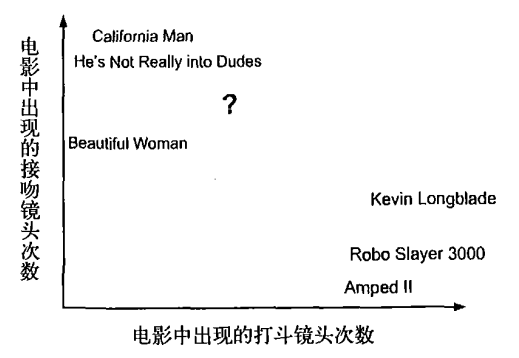

首先我们需要知道这个未知电影存在多少个打斗镜头和接吻镜头，上图中问号位置是该未知电影出现的镜头数图形化展示，具体数字参见下表。

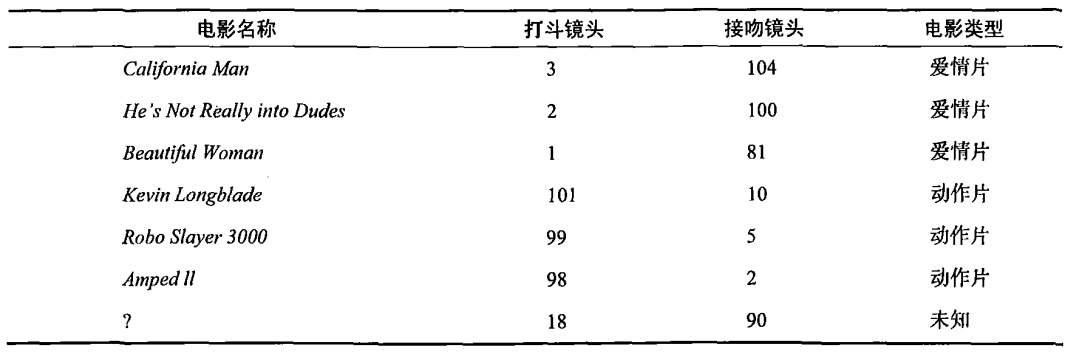

即使不知道未知电影属于哪种类型，我们也可以通过某种方法计算出来。首先计算未知电影与样本集中其他电影的距离，如图所示。

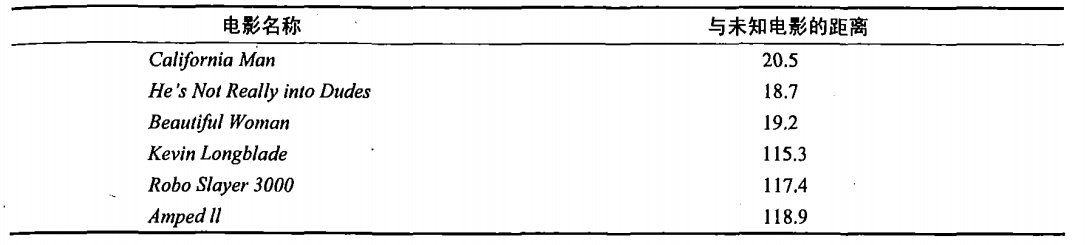

现在我们得到了样本集中所有电影与未知电影的距离，按照距离递增排序，可以找到K个距
离最近的电影。假定k=3，则三个最靠近的电影依次是California Man、He's Not Really into Dudes、Beautiful Woman。K-近邻算法按照距离最近的三部电影的类型，决定未知电影的类型，而这三部电影全是爱情片，因此我们判定未知电影是爱情片。

In [1004]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [1005]:
# 导入数据
films = pd.read_excel('tests.xlsx',sheet_name=1)

In [1006]:
films.shape

(6, 4)

In [1007]:
films

,电影名称,武打镜头,接吻镜头,分类情况
0,大话西游,36,1,动作片
1,杀破狼,43,2,动作片
2,前任3,0,10,爱情片
3,战狼2,59,1,动作片
4,泰坦尼克号,1,15,爱情片
5,星语心愿,2,19,爱情片


In [1008]:
X_train = films[['武打镜头','接吻镜头']]
target = films['分类情况']
display(X_train,target)

,武打镜头,接吻镜头
0,36,1
1,43,2
2,0,10
3,59,1
4,1,15
5,2,19


0    动作片
1    动作片
2    爱情片
3    动作片
4    爱情片
5    爱情片
Name: 分类情况, dtype: object

In [1009]:
# 训练数据
from sklearn.neighbors import KNeighborsClassifier

In [1010]:
# 创建机器学习模型的对象
knn = KNeighborsClassifier()
# 训练
knn.fit(X_train,target)
# 一般来说,训练数据X_train是一个二维的数据,或者DataFrame,target是一个一维的

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [1011]:
X_train['武打镜头']

0    36
1    43
2     0
3    59
4     1
5     2
Name: 武打镜头, dtype: int64

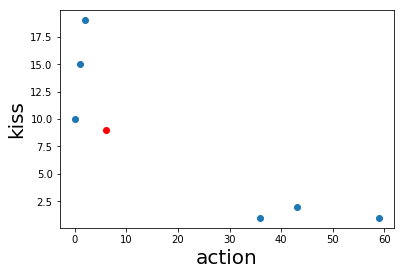

In [1012]:
# 画图
# 散点图
plt.scatter(X_train['武打镜头'],X_train['接吻镜头'])
plt.xlabel('action',fontsize=20)
plt.ylabel('kiss',fontsize=20)
#生成预测数据
X_test = np.array([[6,9]])
plt.scatter(X_test[:,0],X_test[:,1],c='r')

In [1013]:
knn.predict(X_test)

array(['爱情片'], dtype=object)

In [1014]:
knn.score(X_train,target)

1.0

### 欧几里得距离(Euclidean Distance)

欧氏距离是最常见的距离度量，衡量的是多维空间中各个点之间的绝对距离。公式如下：

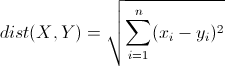

## 2、在scikit-learn库中使用k-近邻算法

- 分类问题：from sklearn.neighbors import KNeighborsClassifier

- 回归问题：from sklearn.neighbors import KNeighborsRegressor

### 0）一个最简单的例子

身高、体重、鞋子尺码数据对应性别

In [1015]:
x_train = np.array([[180,80,43],[168,60,39],[175,80,42],[158,45,36],[170,65,41],[180,70,42],[177,72,43],[162,55,38]])
target = ['男','女','男','女','男','男','男','女']

In [1016]:
# 创建机器学习模型的对象
knn = KNeighborsClassifier()
# 训练
knn.fit(x_train,target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [1017]:
# 预测
x_test = np.array([[185,90,44],[175,60,41],[175,70,42],[155,45,37]])
knn.predict(x_test)

array(['男', '男', '男', '女'], dtype='<U1')

In [1018]:
x_train

array([[180,  80,  43],
       [168,  60,  39],
       [175,  80,  42],
       [158,  45,  36],
       [170,  65,  41],
       [180,  70,  42],
       [177,  72,  43],
       [162,  55,  38]])

In [1019]:
knn.score(x_train,target)

0.875

### 1）用于分类

导包，机器学习的算法KNN、数据鸢尾花


In [1020]:
from sklearn import datasets

获取训练样本

In [1021]:
iris = datasets.load_iris()

In [1022]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [1023]:
data = iris.data
target = iris.target
display(data.shape,target.shape)

(150, 4)

(150,)

In [1024]:
feature_name = iris.feature_names

绘制图形

In [1025]:
from pandas import  Series,DataFrame

In [1026]:
df = DataFrame(data=data,columns=feature_name)

In [1027]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


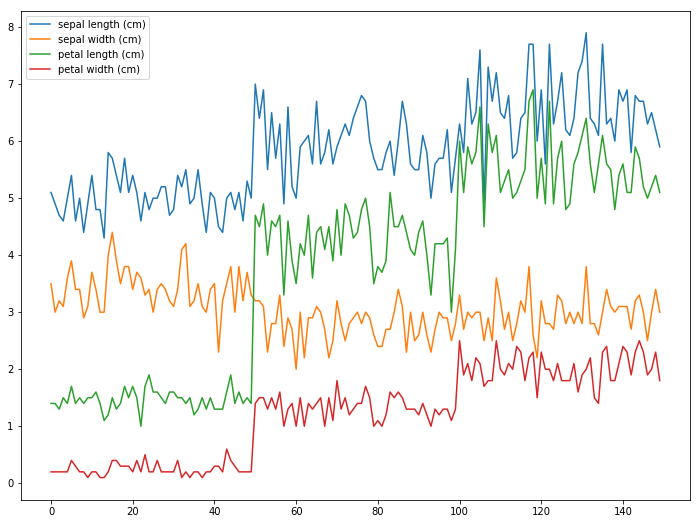

In [1028]:
df.plot(figsize=(12,9))

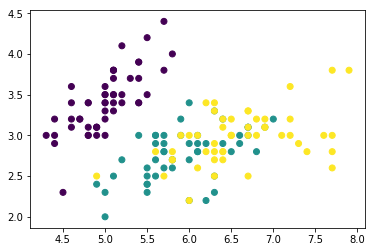

In [1029]:
#使用特征1和特征2
plt.scatter(data[:,0],data[:,1],c = target)

定义KNN分类器

In [1030]:
knn = KNeighborsClassifier()

In [1031]:
# 拆分数据
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.1)

In [1032]:
display(x_train,x_test,y_train,y_test)

array([[6.4, 3.2, 5.3, 2.3],
       [6.1, 3. , 4.6, 1.4],
       [5.4, 3. , 4.5, 1.5],
       [5.1, 3.5, 1.4, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [5. , 2.3, 3.3, 1. ],
       [4.8, 3.4, 1.9, 0.2],
       [5.6, 3. , 4.1, 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [5.6, 2.7, 4.2, 1.3],
       [6.7, 3.1, 5.6, 2.4],
       [5.7, 4.4, 1.5, 0.4],
       [6.4, 2.9, 4.3, 1.3],
       [6.2, 2.9, 4.3, 1.3],
       [5. , 3.5, 1.3, 0.3],
       [5.8, 2.7, 5.1, 1.9],
       [5.1, 2.5, 3. , 1.1],
       [5. , 3.3, 1.4, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [6.1, 3. , 4.9, 1.8],
       [6.5, 3.2, 5.1, 2. ],
       [6.8, 3.2, 5.9, 2.3],
       [7.7, 3. , 6.1, 2.3],
       [6.5, 3. , 5.2, 2. ],
       [5.1, 3.4, 1.5, 0.2],
       [6.7, 3.3, 5.7, 2.1],
       [5.5, 2.5, 4. , 1.3],
       [6.3, 2.3, 4.4, 1.3],
       [5.5, 4.2, 1.4, 0.2],
       [5.7, 2.8, 4.5, 1.3],
       [6.7, 3. , 5. , 1.7],
       [6.7, 2.5, 5.8, 1.8],
       [4.4, 3. , 1.3, 0.2],
       [6.1, 2

array([[4.6, 3.4, 1.4, 0.3],
       [5. , 3.6, 1.4, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [6.5, 2.8, 4.6, 1.5],
       [5.1, 3.8, 1.9, 0.4],
       [5.2, 2.7, 3.9, 1.4],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [7.1, 3. , 5.9, 2.1],
       [5.5, 2.4, 3.8, 1.1],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 2.9, 4.7, 1.4],
       [5. , 3.2, 1.2, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [6.9, 3.1, 5.1, 2.3]])

array([2, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1, 1, 0, 2, 1, 0, 0, 2, 2,
       2, 2, 2, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 0, 2, 0, 0, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 1, 1, 0, 2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 2,
       0, 1, 2, 2, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 2, 1,
       2, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1,
       1, 1, 1])

array([0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2])

In [1033]:
x_train.shape

(135, 4)

第一步，训练数据

In [1034]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

第二步预测数据：，所预测的数据，自己创造，就是上面所显示图片的背景点  

生成预测数据

In [1035]:
knn.predict(x_test)

array([0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2])

In [1036]:
y_test

array([0, 0, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 0, 0, 2])

In [1037]:
# 测试数据里面的得分率
knn.score(x_test,y_test)

1.0

In [1038]:
# 整体的得分率
knn.score(data,target)

0.9666666666666667

对数据进行预测

显示数据

In [1039]:
# 自己创造预测数据
# 先确认范围
display(data[:,0].min(),data[:,0].max())
display(data[:,1].min(),data[:,1].max())

4.3

7.9

2.0

4.4

In [1040]:
x = np.linspace(data[:,0].min(),data[:,0].max()+0.5,100)
y = np.linspace(data[:,1].min(),data[:,1].max()+0.5,100)
X,Y = np.meshgrid(x,y)
display(X.shape,Y.shape)

(100, 100)

(100, 100)

In [1041]:
# 平坦化
X.ravel().shape

(10000,)

In [1042]:
X_test = np.c_[X.ravel(),Y.ravel()]
X_test.shape

(10000, 2)

In [1043]:
knn = KNeighborsClassifier()

In [1044]:
# 重新训练
knn.fit(data[:,:2],target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [1045]:
data[:,:2].shape
target.shape

(150,)

In [1046]:
# 预测
y_ = knn.predict(X_test)

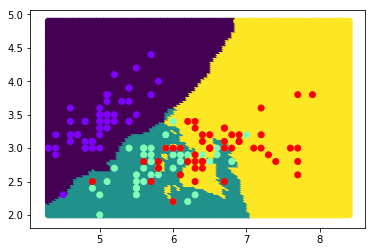

In [1047]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_)
plt.scatter(data[:,0],data[:,1],c=target,cmap='rainbow')

### 2）用于回归  
回归用于对趋势的预测

导包

生成样本数据

生成测试数据的结果

第一步：生成模型，并训练数据

第二步：使用模型，预测数据

绘图显示数据

### 练习
人类动作识别  
步行，上楼，下楼，坐着，站立和躺着  
![](stand-sit-run.jpg)  
数据采集每个人在腰部穿着智能手机，进行了六个活动（步行，上楼，下楼，坐着，站立和躺着）。采用嵌入式加速度计和陀螺仪，以50Hz的恒定速度捕获3轴线性加速度和3轴角速度，来获取数据

导入数据

获取数据

绘制

## 3、作业

#### 1、预测年收入是否大于50K美元

读取adult.txt文件，最后一列是年收入，并使用KNN算法训练模型，然后使用模型预测一个人的年收入是否大于50

In [1048]:
ad = pd.read_csv('adults.txt')
ad.head()

,age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


获取年龄、教育程度、职位、每周工作时间作为机器学习数据  
获取薪水作为对应结果

In [1049]:
ad1 = ad[['age','education','occupation','hours_per_week']]
display(ad1)

,age,education,occupation,hours_per_week
0,39,Bachelors,Adm-clerical,40
1,50,Bachelors,Exec-managerial,13
2,38,HS-grad,Handlers-cleaners,40
3,53,11th,Handlers-cleaners,40
4,28,Bachelors,Prof-specialty,40
5,37,Masters,Exec-managerial,40
6,49,9th,Other-service,16
7,52,HS-grad,Exec-managerial,45
8,31,Masters,Prof-specialty,50
9,42,Bachelors,Exec-managerial,40


In [1050]:
ad1.dtypes
#ad2.dtypes

age                int64
education         object
occupation        object
hours_per_week     int64
dtype: object

数据转换，将String类型数据转换为int

【知识点】map方法，进行数据转换

In [1051]:
ed = ad1['education'].unique()
ed

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [1052]:
index = np.argwhere(ed == 'Bachelors')[0,0]
index

0

In [1053]:
def tf(i):
    index = np.argwhere(ed == i)[0,0]
    return index

In [1054]:
ad1['education'] = ad1['education'].map(tf)

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1055]:
ad1['education']

0         0
1         0
2         1
3         2
4         0
5         3
6         4
7         1
8         3
9         0
10        5
11        0
12        0
13        6
14        7
15        8
16        1
17        1
18        2
19        3
20        9
21        1
22        4
23        2
24        1
25        0
26        1
27        5
28        1
29        1
         ..
32531     0
32532     9
32533     0
32534     5
32535    15
32536     0
32537     1
32538     0
32539     9
32540     1
32541     1
32542     1
32543     6
32544     3
32545     6
32546     6
32547     1
32548    10
32549     5
32550     5
32551    12
32552     7
32553     3
32554     3
32555     5
32556     6
32557     1
32558     1
32559     1
32560     1
Name: education, Length: 32561, dtype: int64

In [1056]:
oc = ad1['occupation'].unique()
oc

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [1057]:
def tf2(i):
    index = np.argwhere(oc == i)[0,0]
    return index

In [1058]:
ad1['occupation'] = ad1['occupation'].map(tf2)

d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1059]:
ad1

,age,education,occupation,hours_per_week
0,39,0,0,40
1,50,0,1,13
2,38,1,2,40
3,53,2,2,40
4,28,0,3,40
5,37,3,1,40
6,49,4,4,16
7,52,1,1,45
8,31,3,3,50
9,42,0,1,40


切片：训练数据和预测数据

In [1060]:
ad2 = ad['salary'].values
ad2

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [1061]:
display(ad1.values,ad2)

array([[39,  0,  0, 40],
       [50,  0,  1, 13],
       [38,  1,  2, 40],
       ...,
       [58,  1,  0, 40],
       [22,  1,  0, 20],
       [52,  1,  1, 40]], dtype=int64)

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [1062]:
data = ad1.values
target = ad2

In [1063]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.1)
display(x_train,x_test,y_train,y_test)

array([[57,  5,  6, 40],
       [50,  0, 11, 60],
       [51,  1,  9, 40],
       ...,
       [44,  7, 14, 25],
       [26,  5,  5, 40],
       [45,  0,  3, 50]], dtype=int64)

array([[36,  1,  6, 40],
       [33,  7,  8, 65],
       [52,  1,  0, 30],
       ...,
       [37,  0,  1, 40],
       [38,  0,  5, 50],
       [54,  1,  6, 49]], dtype=int64)

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

生成算法

In [1064]:
knn = KNeighborsClassifier()

第一步：训练数据

In [1065]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

第二步：预测数据

In [1066]:
knn.predict(x_test)

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '>50K', '>50K'],
      dtype=object)

In [1067]:
y_test

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

In [1068]:
knn.score(x_test,y_test)

0.7592876880564937

In [1069]:
knn.score(data,target)

0.8194465771935752

## 归一化处理

In [1070]:
def tf4(i):
    return (i-min(i))/(max(i)-min(i))

In [1071]:
ad1.columns

Index(['age', 'education', 'occupation', 'hours_per_week'], dtype='object')

In [1072]:
cols =['age', 'education', 'occupation', 'hours_per_week']

In [1073]:
ad1[cols] = ad1[cols].transform(tf4)

d:\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [1074]:
ad1

,age,education,occupation,hours_per_week
0,0.301370,0.000000,0.000000,0.397959
1,0.452055,0.000000,0.071429,0.122449
2,0.287671,0.066667,0.142857,0.397959
3,0.493151,0.133333,0.142857,0.397959
4,0.150685,0.000000,0.214286,0.397959
5,0.273973,0.200000,0.071429,0.397959
6,0.438356,0.266667,0.285714,0.153061
7,0.479452,0.066667,0.071429,0.448980
8,0.191781,0.200000,0.214286,0.500000
9,0.342466,0.000000,0.071429,0.397959


In [1075]:
knn = KNeighborsClassifier()

In [1076]:
data = ad1.values
target = ad2

In [1077]:
knn.fit(data,target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [1078]:
knn.score(data, target)

0.83160836583643

保存训练模型  
from sklearn.externals import joblib

In [1079]:
from sklearn.externals import joblib

In [1080]:
joblib.dump(knn,'money.z')

['money.z']

In [1081]:
knn = joblib.load('money.z')

In [1082]:
knn.predict(x_test)

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [1083]:
knn.score(data,target)

0.83160836583643

#### 2、小麦种类预测

读取seeds.tsv文件，最后一列是小麦品种，其他列是小麦特征

#### 3、改进约会网站的匹配效果

读取datingTestSet.txt文件，最后一列是喜欢程度。模型：根据前几列的信息，预测喜欢程度